In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
df['class'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
#Split ข้อมูลด้วย train_test_split โดยใช้อัตราส่วน 60:40
X = df.drop(['class'], axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [8]:
#ทำ Feature Scaling ด้วย Standardization โดยใช้ข้อมูล X_train เป็นตัว fit
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1]:
#34 สร้างตัวแปร Dimensionality Reduction แบบ LDA โดยกำหนด n_components = 2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [12]:
#35 ดำเนินการ LDA โดยใช้ X_train, y_train เป็นตัว fit และ X_test เป็น transform
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

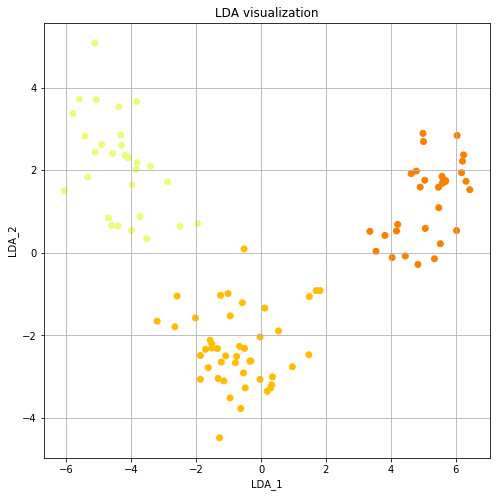

In [14]:
#36 สร้าง Visualization แบบ Clustering ด้วย LDA ทั้งสองแกน
plt.figure(figsize=(8,8))
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='Wistia')
plt.xlabel('LDA_1')
plt.ylabel('LDA_2')
plt.title('LDA visualization')
plt.grid()

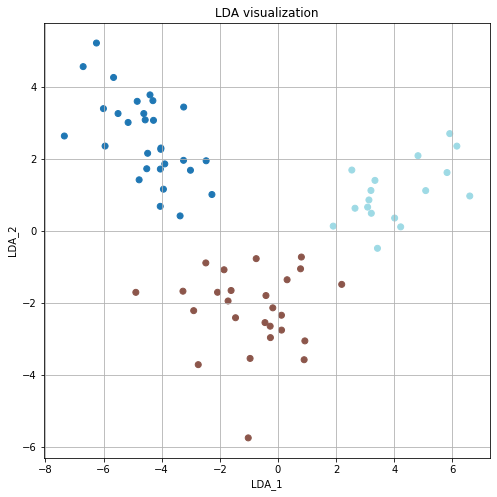

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(X_test_lda[:,0], X_test_lda[:,1], c=y_test, cmap='tab20')
plt.xlabel('LDA_1')
plt.ylabel('LDA_2')
plt.title('LDA visualization')
plt.grid()

In [21]:
#37 สร้างโมเดลแบบ Support Vector Machine ด้วย Components จาก LDA (ข้อ 38-40 ใช้โมเดลจากข้อ 37)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_lda, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
predicted = svc.predict(X_test_lda)

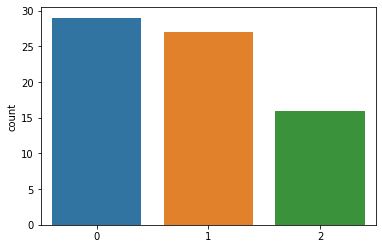

In [23]:
#38 สร้าง countplot ของค่าที่ทำนายโดย Support Vector Machine
plt.figure(figsize=(6,4))
sns.countplot(predicted)

In [26]:
#39 วัดผลโมเดล SVM โดยใช้ confusion matrix
confusion_matrix(y_test, predicted)

array([[29,  0,  0],
       [ 0, 26,  0],
       [ 0,  1, 16]], dtype=int64)

In [27]:
#40 ประเมินผลโมเดล SVM ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro
print('SVM + LDA')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='micro'))
print('Recall: ', recall_score(y_test, predicted, average='micro'))
print('Precision: ', precision_score(y_test, predicted, average='micro'))
print('\n')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='macro'))
print('Recall: ', recall_score(y_test, predicted, average='macro'))
print('Precision: ', precision_score(y_test, predicted, average='macro'))

SVM + LDA
Accuracy:  0.9861111111111112
F1 score:  0.9861111111111112
Recall:  0.9861111111111112
Precision:  0.9861111111111112


Accuracy:  0.9861111111111112
F1 score:  0.9836096817228892
Recall:  0.9803921568627452
Precision:  0.9876543209876543


In [34]:
#41 ทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM ด้วย Components จาก LDA
param_combination = {'C':[0.1,1], 'gamma':[0.001, 0.01, 0.1]}

In [35]:
grid_search = GridSearchCV(SVC(), param_combination, verbose=3)

In [36]:
grid_search.fit(X_train_lda, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.409, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.429, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.429, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.429, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.429, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.909, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [37]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1}

In [38]:
grid_search.predict(X_test_lda)

array([1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 2, 1, 0, 1, 1])

In [39]:
#42 วัดผลโมเดล SVM หลัง Hyperparameter tuning ด้วย confusion matrix
confusion_matrix(y_test, predicted)

array([[29,  0,  0],
       [ 0, 26,  0],
       [ 0,  1, 16]], dtype=int64)

In [40]:
#43 ประเมินผลโมเดล SVM หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro
print('SVM + LDA + HT')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='micro'))
print('Recall: ', recall_score(y_test, predicted, average='micro'))
print('Precision: ', precision_score(y_test, predicted, average='micro'))
print('\n')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='macro'))
print('Recall: ', recall_score(y_test, predicted, average='macro'))
print('Precision: ', precision_score(y_test, predicted, average='macro'))

SVM + LDA + HT
Accuracy:  0.9861111111111112
F1 score:  0.9861111111111112
Recall:  0.9861111111111112
Precision:  0.9861111111111112


Accuracy:  0.9861111111111112
F1 score:  0.9836096817228892
Recall:  0.9803921568627452
Precision:  0.9876543209876543


In [41]:
#44 สร้างโมเดลแบบ Random Forest ด้วย Components จาก LDA (ข้อ 45-47 ใช้โมเดลจากข้อ 44)
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predicted = rf.predict(X_test_lda)

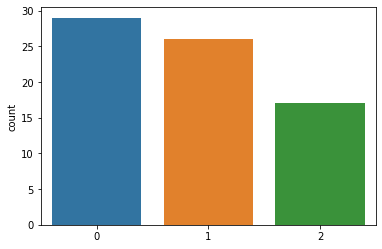

In [43]:
#45 สร้าง countplot ของค่าที่ทำนายโดย RF
plt.figure(figsize=(6,4))
sns.countplot(predicted)

In [44]:
#46 วัดผลโมเดล RF โดยใช้ confusion matrix
confusion_matrix(y_test, predicted)

array([[29,  0,  0],
       [ 0, 26,  0],
       [ 0,  0, 17]], dtype=int64)

In [45]:
#47 ประเมินผลโมเดล RF ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro
print('RF + LDA')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='micro'))
print('Recall: ', recall_score(y_test, predicted, average='micro'))
print('Precision: ', precision_score(y_test, predicted, average='micro'))
print('\n')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='macro'))
print('Recall: ', recall_score(y_test, predicted, average='macro'))
print('Precision: ', precision_score(y_test, predicted, average='macro'))

RF + LDA
Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0


Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0


In [47]:
#48 Hyperparameter tuning ด้วย GridSearchCV กับ RF ด้วย Components จาก LDA
param_combination = {'n_estimators':[20,50], 'max_depth':[4,8], 'min_samples_split':[1,2]}
grid_search = GridSearchCV(RandomForestClassifier(), param_combination, verbose=3)

In [48]:
grid_search.fit(X_train_lda, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=4, min_samples_split=1, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=4, min_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selecti

[CV]  max_depth=4, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=4, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=4, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=20, score=1.000, total=   0.0s

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)



[CV] max_depth=4, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=20, score=0.952, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=50, score=1.000, total=   0.2s
[CV] max_depth=4, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=50, score=1.000, total=   0.2s
[CV] max_depth=4, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=2, n_estimators=50, score=0.952, total=   0.1s
[CV] max_depth=4, min_samples_split=2, n_estimators=50 ..............

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]

[CV]  max_depth=8, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=8, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=8, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] max_depth=8, min_samples_split=1, n_estimators=50 ...............


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=8, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=8, min_samples_split=1, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] max_depth=8, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_split=2, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_split=2, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_split=2, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_split=2, n_estimators=20, score=0.952, total=   0.0s
[CV] max_depth=8, min_samples_split=2, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_split=2, n_estimators=20, score=1.000, tota

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [49]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 20}

In [50]:
predicted = grid_search.predict(X_test_lda)

In [51]:
#49 วัดผลโมเดล Random Forest หลัง Hyperparameter tuning ด้วย confusion matrix 
confusion_matrix(y_test, predicted)

array([[29,  0,  0],
       [ 0, 26,  0],
       [ 0,  1, 16]], dtype=int64)

In [52]:
#50 ประเมินผลโมเดล RF หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro
print('RF + LDA + HT')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='micro'))
print('Recall: ', recall_score(y_test, predicted, average='micro'))
print('Precision: ', precision_score(y_test, predicted, average='micro'))
print('\n')
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted, average='macro'))
print('Recall: ', recall_score(y_test, predicted, average='macro'))
print('Precision: ', precision_score(y_test, predicted, average='macro'))

RF + LDA + HT
Accuracy:  0.9861111111111112
F1 score:  0.9861111111111112
Recall:  0.9861111111111112
Precision:  0.9861111111111112


Accuracy:  0.9861111111111112
F1 score:  0.9836096817228892
Recall:  0.9803921568627452
Precision:  0.9876543209876543
